In [1]:
### --- Standard libraries ---
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import sys

### --- Genomic tools ---
import bioframe
import pysam
from pyfaidx import Fasta  # You'll use this later for sequence extraction

### --- Custom modules ---
#from dna_io import dna_1hot
#import models as mod
import ChipFold.utils.convert as conv
import ChipFold.utils.experimentalpath as path
from ChipFold.ml.funcs import dna_1hot
import ChipFold.ml.funcs as func

In [2]:
ctcfbeds = path.ctcf_peaks 
ctcfmotif = path.ctcf_motifs

In [3]:
ctcf = bioframe.read_table(ctcfbeds, schema='bed')
ctcf['mid']=(ctcf.end+ctcf.start)/2
motif=bioframe.read_table(ctcfmotif)
motif=motif.rename(columns={0: 'chrom', 1: 'start',2:'end',3:'name',4:'score',5:'pval',6:'strand'})
#df = pd.read_csv(path.ctcf_peaks, sep="\t")
peaksmotifs = bioframe.overlap(ctcf,motif,how='inner')[['chrom','start','end','score','strand_']]
peaksmotifs = peaksmotifs.rename(columns={"strand_": "strand"})
peaksmotifs[44:48]

,chrom,start,end,score,strand
44,chrX,8139379,8139697,22.50611,-
45,chrX,8314848,8315340,118.02354,+
46,chrX,8314848,8315340,118.02354,+
47,chrX,8353458,8353826,47.33170,-


In [4]:
ctcfmotifsconv = conv.convert_ctcf_occupancy(peaksmotifs,ctcfbeds,max_occup=0.95)
ctcfmotifsconv

,chrom,start,end,strand,score_,occupancy
0,chrX,5941990,5942307,+,32.47781,0.179616
1,chrX,5941990,5942307,+,32.47781,0.179616
2,chrX,6261467,6261830,-,27.10947,0.149927
3,chrX,6261467,6261830,+,27.10947,0.149927
4,chrX,6911113,6911414,+,32.47781,0.179616
...,...,...,...,...,...,...
55068,chr15,103482491,103482846,+,55.88671,0.309077
55069,chr15,103530288,103530761,+,109.06193,0.603158
55070,chr15,103547954,103548345,-,51.26492,0.283516
55071,chr15,103552013,103552422,+,48.14506,0.266262


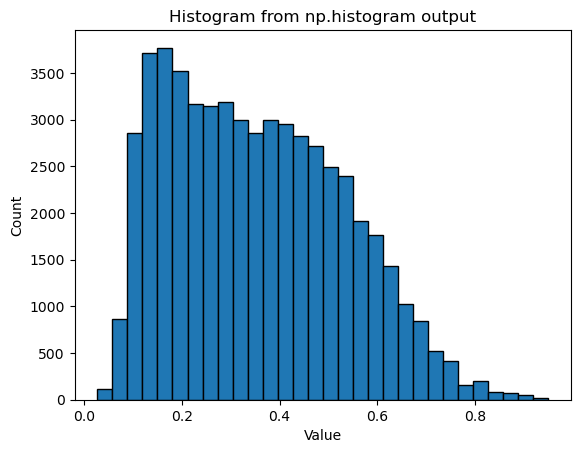

In [5]:
import matplotlib.pyplot as plt

counts, bin_edges = np.histogram(ctcfmotifsconv['occupancy'], bins=30)

plt.bar(
    bin_edges[:-1],       # left edges of bins
    counts,               
    width=np.diff(bin_edges),  # width of each bin
    edgecolor="black",
    align="edge"
)
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram from np.histogram output")
plt.show()


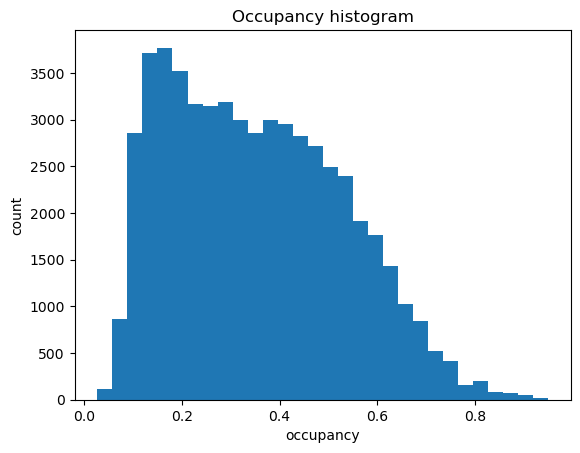

In [9]:
import matplotlib.pyplot as plt
#plt.hitogram(ctcfmotifsconv['occupancy'])
plt.hist(ctcfmotifsconv['occupancy'].dropna(), bins=30)
plt.xlabel('occupancy'); plt.ylabel('count'); plt.title('Occupancy histogram')
plt.show()


In [6]:
ctcfmotifsconv = conv.convert_ctcf_occupancy(peaksmotifs,ctcfbeds,max_occup=0.95, method='sigmoid')
ctcfmotifsconv

,chrom,start,end,strand,score_
0,chrX,5941990,5942307,+,32.47781
1,chrX,5941990,5942307,+,32.47781
2,chrX,6261467,6261830,-,27.10947
3,chrX,6261467,6261830,+,27.10947
4,chrX,6911113,6911414,+,32.47781
...,...,...,...,...,...
55068,chr15,103482491,103482846,+,55.88671
55069,chr15,103530288,103530761,+,109.06193
55070,chr15,103547954,103548345,-,51.26492
55071,chr15,103552013,103552422,+,48.14506
